# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
Temp = []
MaxTemp = []
Humidity = []
Cloudiness = []
WindSpeed = []
Latitude = []
Longitude = []
CityID = []
City = []
LatLong = []
CountryCode = []


for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        Latitude.append(response['coord']['lat'])
        Longitude.append(response['coord']['lon'])
        Humidity.append(response['main']['humidity'])
        Temp.append(response['main']['temp'])
        Cloudiness.append(response['clouds']['all'])
        WindSpeed.append(response['wind']['speed'])
        CityID.append(response['id'])
        City.append(response['name'])
        MaxTemp.append(response['main']['temp_max'])
        LatLong.append(response['coord'])
        CountryCode.append(response['sys']['country'])
        print(f"processing City {city} CityID: {response['id']}")
        
    

processing City ushuaia CityID: 3833367
processing City arraial do cabo CityID: 3471451
processing City jamestown CityID: 5122534
processing City hobart CityID: 2163355
processing City dikson CityID: 1507390
processing City birjand CityID: 140463
processing City kitimat CityID: 5993072
processing City szentes CityID: 715338
processing City tiksi CityID: 2015306
processing City kholm CityID: 549786
processing City bluff CityID: 2206939
processing City tiarei CityID: 4033356
processing City mataura CityID: 6201424
processing City rikitea CityID: 4030556
processing City hermanus CityID: 3366880
processing City vostok CityID: 2013279
processing City khoy CityID: 126972
processing City mayo CityID: 4362001
processing City tanete CityID: 1629965
processing City mehriz CityID: 124274
processing City arlit CityID: 2447513
processing City albany CityID: 5106841
processing City santa cruz CityID: 3904906
processing City college CityID: 5859699
processing City ancud CityID: 3899695
processing Cit

processing City encarnacion CityID: 3438735
processing City yar-sale CityID: 1486321
processing City ribeira grande CityID: 3372707
processing City hilo CityID: 5855927
processing City norman wells CityID: 6089245
processing City ewa beach CityID: 5855051
processing City burnie CityID: 2173125
processing City koshurnikovo CityID: 1502389
processing City sao filipe CityID: 3374210
processing City nagato CityID: 1899102
processing City saint-augustin CityID: 6137462
processing City mahebourg CityID: 934322
processing City pochutla CityID: 3517970
processing City atar CityID: 2381334
processing City khatanga CityID: 2022572
processing City east london CityID: 1006984
processing City malanje CityID: 2239862
processing City tsiroanomandidy CityID: 1054463
processing City nanortalik CityID: 3421765
processing City swidnik CityID: 757692
processing City mbandaka CityID: 2312895
processing City souillac CityID: 933995
processing City barra da estiva CityID: 3470744
processing City nha trang Ci

processing City akureyri CityID: 2633274
processing City itupiranga CityID: 3397851
processing City kalmunai CityID: 1242110
processing City puerto cabezas CityID: 3617154
processing City vanimo CityID: 2084442
processing City faya CityID: 110690
processing City plouzane CityID: 2986626
processing City davila CityID: 1715335
processing City santiago de chuco CityID: 3692072
processing City voi CityID: 178522
processing City chkalovskoye CityID: 2025325
processing City kruisfontein CityID: 986717
processing City vicosa do ceara CityID: 3385106
processing City gisborne CityID: 2206854
processing City kiunga CityID: 2093846
processing City san quintin CityID: 3984997
processing City tigil CityID: 2120612
processing City royan CityID: 2982343
processing City pangnirtung CityID: 6096551
processing City vila CityID: 7117100
processing City miandrivazo CityID: 1059051
processing City mapiri CityID: 3910758
processing City bathsheba CityID: 3374083
processing City kattivakkam CityID: 1267433
p

In [30]:
### Convert Raw Data to DataFrame
# Export the city data into a .csv.
# Display the DataFrame
city_df = pd.DataFrame({'CityID' : CityID,
                    'City' : City,
                    'Humidity' : Humidity,
                    'Temp' : Temp,
                    'Latitude' : Latitude,
                    'Cloudiness' : Cloudiness,
                    'WindSpeed' : WindSpeed,
                    'MaxTemp' : MaxTemp,
                    'Longitude' : Longitude,
                     'LatLong' : LatLong,
                     'CountryCode' : CountryCode
                       })

city_df

city_df.to_csv('city_df.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

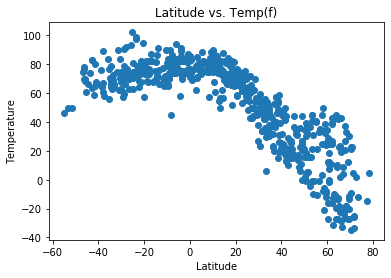

<Figure size 432x288 with 0 Axes>

In [45]:
x_values = city_df['Latitude']
y_values = city_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temp(f)')
plt.show()
plt.savefig('Latitude-Temp.png')
#This scatter plot is showing the relationship between Temperature and Latititue. It shows that the temperature is highest between
# -20 and +20 latitude, or the closer to 0 the higher the temp.


#### Latitude vs. Humidity Plot

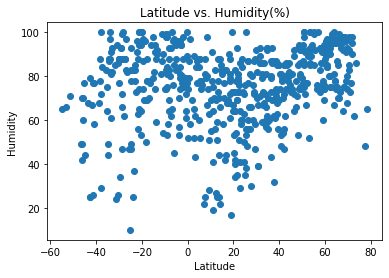

<Figure size 432x288 with 0 Axes>

In [46]:
x_values = city_df['Latitude']
y_values = city_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(%)')
plt.show()
plt.savefig('Latitude-Humidity.png')
#This is plotting the humidity % for each location based on it's latitude.

#### Latitude vs. Cloudiness Plot

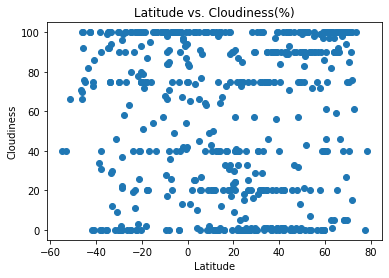

<Figure size 432x288 with 0 Axes>

In [47]:
x_values = city_df['Latitude']
y_values = city_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness(%)')
plt.show()
plt.savefig('Latitude-Clouds.png')
#This scatter plot is showing the relationship between latitude and cloudiness, which does not seem to be linked.

#### Latitude vs. Wind Speed Plot

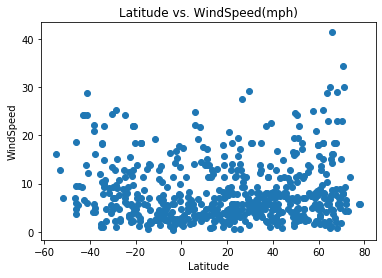

<Figure size 432x288 with 0 Axes>

In [48]:
x_values = city_df['Latitude']
y_values = city_df['WindSpeed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title('Latitude vs. WindSpeed(mph)')
plt.show()
plt.savefig('Latitude-WindSpeed.png')
#This is plotting the wind speed of each latitude.

## Linear Regression

In [35]:
# Create Northern and Southern Hemisphere DataFrames
NorthHemi_df = city_df[city_df['Latitude']>=0]
SouthHemi_df = city_df[city_df['Latitude']<0]

NorthHemi_df.head()
SouthHemi_df.head()

,CityID,City,Humidity,Temp,Latitude,Cloudiness,WindSpeed,MaxTemp,Longitude,LatLong,CountryCode
0,3833367,Ushuaia,65,46.40,-54.80,40,16.11,46.40,-68.30,"{'lon': -68.3, 'lat': -54.8}",AR
1,3471451,Arraial do Cabo,85,74.59,-22.97,100,3.15,74.59,-42.03,"{'lon': -42.03, 'lat': -22.97}",BR
3,2163355,Hobart,25,83.16,-42.88,100,24.16,84.99,147.33,"{'lon': 147.33, 'lat': -42.88}",AU
10,2206939,Bluff,49,74.62,-46.60,71,6.93,74.62,168.33,"{'lon': 168.33, 'lat': -46.6}",NZ
11,4033356,Tiarei,78,82.22,-17.53,20,18.34,82.40,-149.33,"{'lon': -149.33, 'lat': -17.53}",PF


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

2      34.673124
4      -7.067541
5      46.938846
6      18.792801
7      28.626641
         ...    
561    46.792667
562     3.656660
563     6.301166
567    61.118180
569     8.081888
Name: Latitude, Length: 382, dtype: float64
y = -1.33x +90.62
The r-squared is: 0.7504252791881989


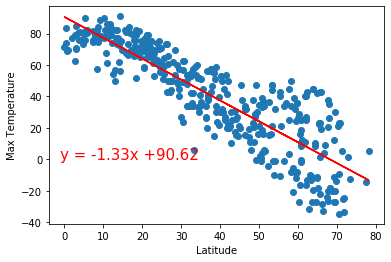

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-1,0),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Temp North.png')
 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      66.212705
1      74.586225
3      69.348500
10     68.369879
11     76.017327
         ...    
559    72.331715
564    80.379028
565    75.877899
566    74.107438
568    74.352093
Name: Latitude, Length: 188, dtype: float64
y = 0.26x +80.63
The r-squared is: 0.13429140245555285


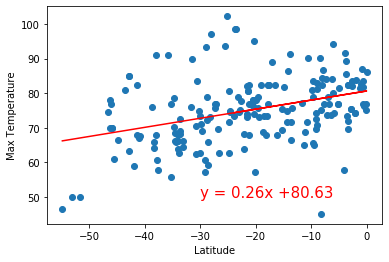

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['MaxTemp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Temp South.png')

In [ ]:
#These 2 plots are showing the max temperatures versus latitude in the northern and southern hemispheres. They show that there is a stronger relationship between latitude and max tempurature in the Northern Hemisphere
#and the max temp in both hemispheres get higher closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

2      76.320064
4      87.982426
5      72.893015
6      80.757034
7      78.009454
         ...    
561    72.933857
562    84.986079
563    84.247203
567    68.931302
569    83.749668
Name: Latitude, Length: 382, dtype: float64
y = 0.37x +60.69
The r-squared is: 0.19192918570698322


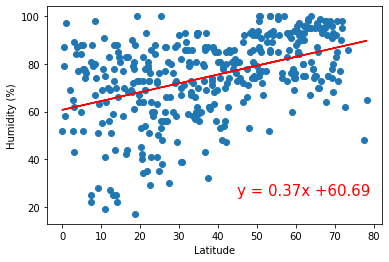

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Humidity North.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      63.578871
1      76.003734
3      68.231852
10     66.779747
11     78.127242
         ...    
559    72.658428
564    84.599256
565    77.920356
566    75.293296
568    75.656322
Name: Latitude, Length: 188, dtype: float64
y = 0.39x +84.97
The r-squared is: 0.07760796754995362


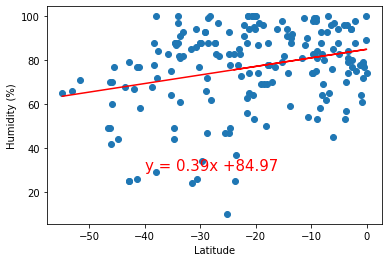

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Humidity South.png')

In [ ]:
#These 2 graphs are showing the relationship between latitude and humidity% inthe northern and southern hemispheres. Neither show a very strong corralation, except that they seem to get more humid as you go north.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

2      76.320064
4      87.982426
5      72.893015
6      80.757034
7      78.009454
         ...    
561    72.933857
562    84.986079
563    84.247203
567    68.931302
569    83.749668
Name: Latitude, Length: 382, dtype: float64
y = 0.37x +60.69
The r-squared is: 0.19192918570698322


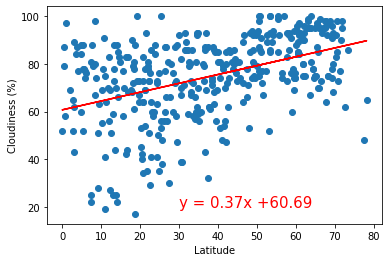

<Figure size 432x288 with 0 Axes>

In [40]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Cloudiness North.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      54.638353
1      65.017589
3      58.525267
10     57.312237
11     66.791483
         ...    
559    62.223054
564    72.197946
565    66.618658
566    64.424117
568    64.727374
Name: Latitude, Length: 188, dtype: float64
y = 0.33x +72.51
The r-squared is: 0.015097188028049536


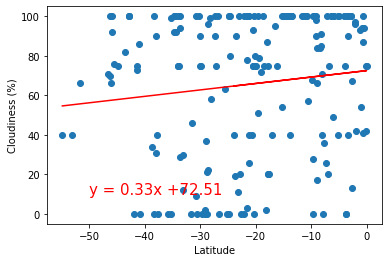

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Cloudiness South.png')

In [ ]:
#These 2 charts are plotting the cloudiness at each latitude. There doesn't seem to be much correlation between latutude and clouds except a little bit in the nothern hemisphere where it gets slightly more cloudy in higher latitudes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

2       8.572701
4      10.189430
5       8.097616
6       9.187789
7       8.806897
         ...    
561     8.103278
562     9.774053
563     9.671624
567     7.548412
569     9.602652
Name: Latitude, Length: 382, dtype: float64
y = 0.05x +6.41
The r-squared is: 0.02676811097411736


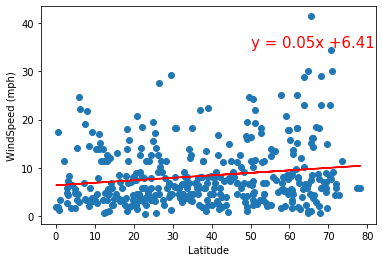

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = NorthHemi_df['Latitude']
y_values = NorthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(50,35),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Wind North.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      13.011863
1       8.662006
3      11.382887
10     11.891259
11      7.918581
         ...    
559     9.833174
564     5.652774
565     7.991010
566     8.910725
568     8.783632
Name: Latitude, Length: 188, dtype: float64
y = -0.14x +5.52
The r-squared is: 0.08934281936951773


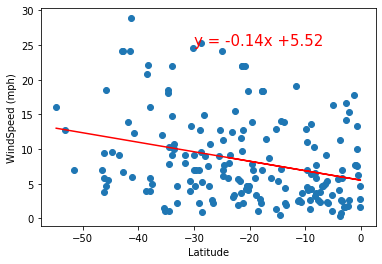

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = SouthHemi_df['Latitude']
y_values = SouthHemi_df['WindSpeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WindSpeed (mph)')
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
#plt.annotate lets you put text in graph

# Print r square value
print(f"The r-squared is: {rvalue*rvalue}")

# Show plot
plt.show()
plt.savefig('Lat-Wind South.png')

In [ ]:
#These two are showing the correlation between wind speed in mph to latitude in the northern and southern hemispheres.

In [ ]:
#3 observations:
#Temperature increases as latitude gets closer to the equator.
#Humidity seems to increase in general the farther north you go.
#Within the limits set, wind does not seem to get faster than about 3 mph, with one exception at 40 and 2 at 35.
